<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the difference between a discriminator and generator in a GAN
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [4]:
!pip install numpy==1.16.1
import numpy as np

In [1]:
from tensorflow.keras.datasets import reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [2]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [9]:
len(word_index)

30979

In [10]:
# TODO - your code!
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM

max_features = 2000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
# taking the first 80 chars will make the results converge faster, though the model can take variable size inputs
batch_size = 32
# relatively small batch size for RNN

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
# This is a pre-processing technique that chops X into 80 char chunks and turn them into time sequences


print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Build model...


W0726 08:20:50.206080 140546905990976 deprecation.py:506] From /home/nedderlander/anaconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0726 08:20:50.247831 140546905990976 deprecation.py:506] From /home/nedderlander/anaconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0726 08:20:50.516355 140546905990976 deprecation.py:323] From /home/nedderlander/anaconda3/envs/tensorflow_gpu/lib/python3.7/s

Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/15
8982/8982 [==============================] - 25s 3ms/sample - loss: -244.9196 - acc: 0.0499 - val_loss: -393.9614 - val_acc: 0.0396
Epoch 2/15
8982/8982 [==============================] - 21s 2ms/sample - loss: -539.2621 - acc: 0.0499 - val_loss: -670.8770 - val_acc: 0.0396
Epoch 3/15
8982/8982 [==============================] - 22s 2ms/sample - loss: -817.6883 - acc: 0.0499 - val_loss: -943.9766 - val_acc: 0.0396
Epoch 4/15
8982/8982 [==============================] - 22s 2ms/sample - loss: -1094.5046 - acc: 0.0499 - val_loss: -1216.7143 - val_acc: 0.0396
Epoch 5/15
8982/8982 [==============================] - 22s 3ms/sample - loss: -1370.2700 - acc: 0.0499 - val_loss: -1488.9505 - val_acc: 0.0396
Epoch 6/15
8982/8982 [==============================] - 22s 2ms/sample - loss: -1645.4390 - acc: 0.0499 - val_loss: -1760.4371 - val_acc: 0.0396
Epoch 7/15
8982/8982 [==============================] - 22s 2ms/sample - loss: 

Conclusion - RNN runs, and gives pretty decent improvement over a naive model. To *really* improve the model, more playing with parameters would help. Also - RNN may well not be the best approach here, but it is at least a valid one.

In [ ]:
# Well, 4% accuracy isn't anything to sneeze at I suppose

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [11]:
!pip install google_images_download

In [13]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3.PKLS4116_inline.png
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 4.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Image URL: https://cdn.pixabay.com/photo/2018/04/11/23/05/frog-3312038__340.jpg
Completed Image ====> 5.frog-3312038__340.jpg
Image URL: https://i.pinimg.com/originals/57/5c/5b/575c5b5c441e27ff04eb50571ee30127.jpg
Completed Image ====> 6.575c5b5c441e27ff04eb50571ee30127.jpg
Image URL: 

At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [54]:
from PIL import Image, ImageOps
import os
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from matplotlib.pyplot import imshow

In [38]:
# TODO - your code!

path = './downloads/animal pond/'

def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

model = ResNet50(weights='imagenet')

def get_img_results(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    results = decode_predictions(features, top=5)[0]
    return results

files = []
results = {}

for file in os.listdir(path):
    filename= path+file
    files.append(filename)
    img = process_img_path(filename)
    results[filename] = get_img_results(img)
    
for key in results.keys():
    files.append(key)

In [58]:
def display_image(path):
    pil_im = Image.open(path)
    imshow(np.asarray(pil_im));

web_site: 70.75%
leopard: 2.12%
dung_beetle: 1.79%
pineapple: 1.78%
jaguar: 1.33%


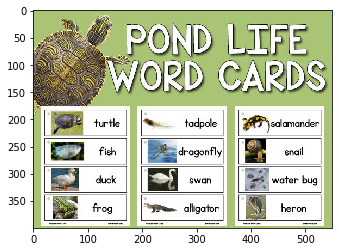

In [59]:
for pred in results[files[0]]:
    print(str(pred[1]) + ': ' + str(round(pred[2]*100,2)) + '%')
display_image(files[0])

jigsaw_puzzle: 21.94%
agaric: 5.29%
padlock: 4.87%
umbrella: 4.67%
shower_curtain: 4.52%


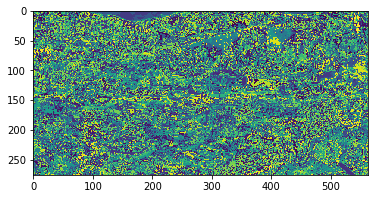

In [60]:
for pred in results[files[1]]:
    print(str(pred[1]) + ': ' + str(round(pred[2]*100,2)) + '%')
display_image(files[1])

bullfrog: 92.23%
tailed_frog: 7.36%
tree_frog: 0.12%
rock_crab: 0.07%
African_crocodile: 0.05%


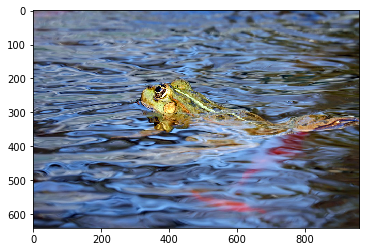

In [61]:
for pred in results[files[2]]:
    print(str(pred[1]) + ': ' + str(round(pred[2]*100,2)) + '%')
display_image(files[2])

slot: 87.12%
tray: 4.99%
pencil_box: 2.31%
envelope: 0.88%
handkerchief: 0.43%


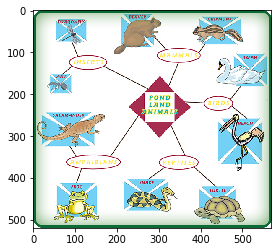

In [62]:
for pred in results[files[3]]:
    print(str(pred[1]) + ': ' + str(round(pred[2]*100,2)) + '%')
display_image(files[3])

tray: 23.65%
sombrero: 18.79%
pillow: 5.83%
plate_rack: 5.66%
bib: 3.6%


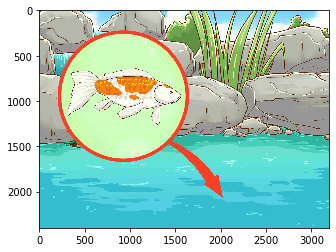

In [63]:
for pred in results[files[4]]:
    print(str(pred[1]) + ': ' + str(round(pred[2]*100,2)) + '%')
display_image(files[4])

mink: 30.98%
beaver: 23.4%
marmot: 20.8%
weasel: 9.19%
polecat: 7.37%


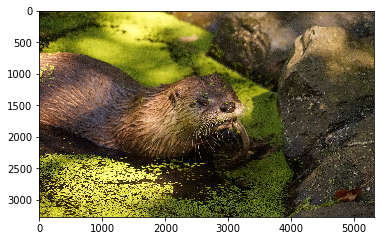

In [64]:
for pred in results[files[5]]:
    print(str(pred[1]) + ': ' + str(round(pred[2]*100,2)) + '%')
display_image(files[5])

water_snake: 30.73%
bullfrog: 26.06%
spider_web: 11.34%
dragonfly: 4.44%
wolf_spider: 3.18%


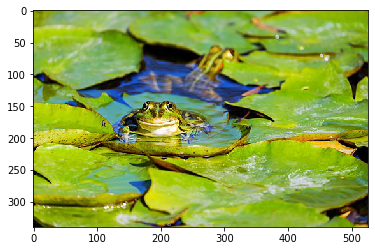

In [70]:
for pred in results[files[14]]:
    print(str(pred[1]) + ': ' + str(round(pred[2]*100,2)) + '%')
display_image(files[14])

<a id="p3"></a>
## Part 3 - Generative Adverserial Networks (GANS)

Describe the difference between a discriminator and generator in a GAN in your own words.

__*Your Answer:*__ 

If we were to use the metaphore of art forgery to describe a GAN, then the forger is the generator and the curator is the discriminator.

To be slightly more technical, the discriminator trains itself to minimize the loss from the number of fakes it classifies as real (so it learns to spot fakes better) while the generator trains itself by minimizing the loss from the number of fakes the discriminator classifies as false (so it learns to fake better).

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

I'm methodical and clean in my process because I find the subject complicated. Because I often come back to projects and usually get my best results after several iterations, I prioritize clean and conceptually sound development and iteration. As a result my work is understandable and easy to reproduce. 

- What area of Data Science would you most like to learn more about, and why?

I want to learn more about NLP and NNs. For me, a personal win would be implementing automatic analysis of information so I don't have to waste mental bandwidth on discriminating shit posters from data scientists with good content on twitter for example.

I also would like to be able to do largescale analysis on public records to catch sloppy fraud and or political shennanigans. I think that a lot of inefficiency and bad behavior is hidden through complexity so if I could work to clean up this data to give a better understanding of say, the financial comitments of politicians or managers in businesses, that could incentivize better behavior.

- Where do you think Data Science will be in 5 years?

Either we'll discover that these tools are so useful that data science will be like excel, ubiquitous and involved in every aspect of business, or, it will have been hyped too hard and in the next recession businesses cut investment and it goes through another period of winter.

- What are the treats posed by AI to our society?

Long term: singularity, super intelligence, eschatological 

Medium term: AI + surveillance + autonomous weapons creates a state where users of AI can wage war costlessly on their percieved enemies. Genocide, class-icide, eugentic ellimination of the poor, impoverishment of the low tech as all social gains flow to the users of AI

Short term: Growth of police states like China, further wealth/power concentration, thoughtless deployment of AI leading to excaserbation of existing biases and inefficient social outcomes

- How do you think we can counteract those threats? 

The solution is probably social, if we have a stratified society then AI will be used to increase that stratification. If we have a flatter society then it will be used in that aim. As people come into contact with more AI they may become more educated and develop sophisticated views that reveal as yet unknown solutions.

- Do you think achieving General Artifical Intelligence is ever possible?

Of course, it may take a while but by any measure, the incentive to create a GAI is strong. It seems just as audacious as putting a human in space, or on the moon, or shrinking super computers to pocket size. 

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [71]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")